## First analisys

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing as pr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/auto_clean.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
print(df.dtypes)
df.info()

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  

In [4]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [5]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [6]:
corr_ = df.corr()

<AxesSubplot:>

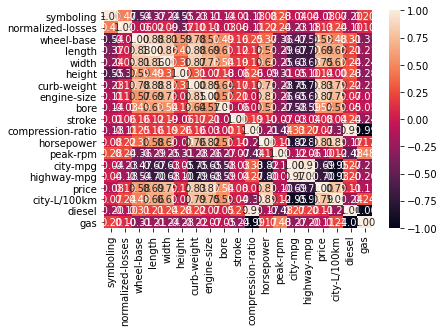

In [7]:
sns.heatmap(corr_, annot=True, fmt='.2f')

In [8]:
CorField = []
for i in corr_:
    for j in corr_.index[corr_[i] > 0.7]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print (i,j, corr_[i][corr_.index==j].values[0])

wheel-base length 0.8760238919618005
wheel-base width 0.8145066522681035
wheel-base curb-weight 0.782097244415664
engine-size horsepower 0.8226756460813216
engine-size price 0.8723351674455182
engine-size city-L/100km 0.7450588874770459
compression-ratio diesel 0.9852311290083917
city-mpg highway-mpg 0.9720437058960102


In [9]:
corr_ = df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()
corr_

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


(0.0, 53088.41900446395)

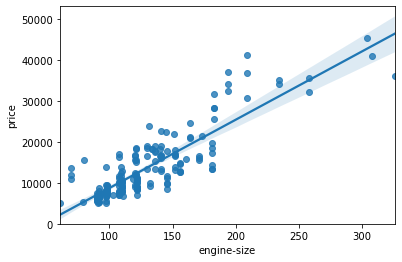

In [10]:
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

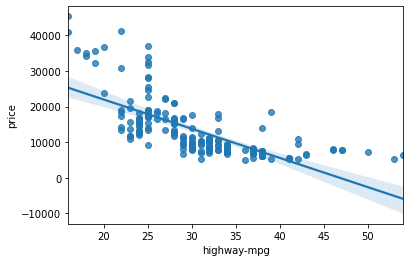

In [11]:
sns.regplot(x='highway-mpg', y='price', data=df)

In [12]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

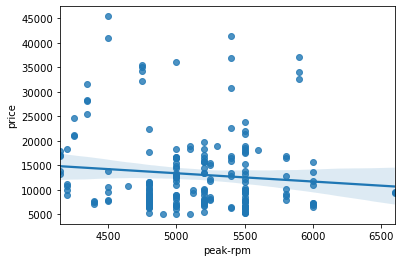

In [13]:
sns.regplot(x='peak-rpm', y='price', data=df)

In [14]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<AxesSubplot:xlabel='stroke', ylabel='price'>

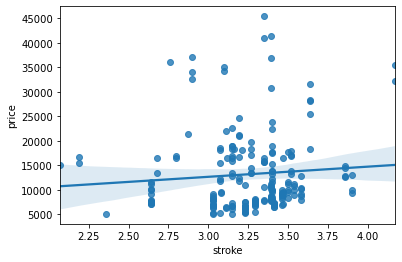

In [15]:
sns.regplot(x='stroke', y='price', data=df)

In [16]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<AxesSubplot:xlabel='body-style', ylabel='price'>

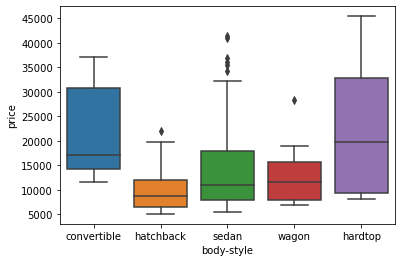

In [17]:
sns.boxplot(x='body-style', y='price', data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

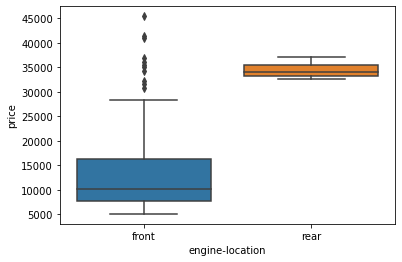

In [18]:
sns.boxplot(x='engine-location', y='price', data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

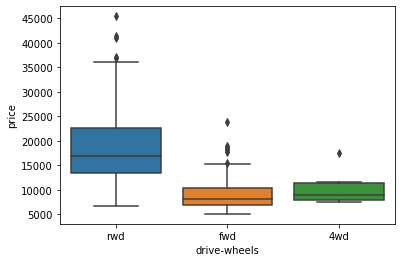

In [19]:
sns.boxplot(x='drive-wheels', y='price', data=df)

In [20]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [21]:
df.describe(include='object')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [22]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [23]:
drive_wheel_counts = df['drive-wheels'].value_counts().to_frame()

In [24]:
drive_wheel_counts

,drive-wheels
fwd,118
rwd,75
4wd,8


In [25]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-localtion': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,engine-location
engine-location,
front,198
rear,3


In [26]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [27]:
df_group_one = df[['drive-wheels', 'body-style', 'price']]

In [28]:
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [29]:
df_gptest = df[['drive-wheels', 'body-style', 'price']]
grouped_test1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [30]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

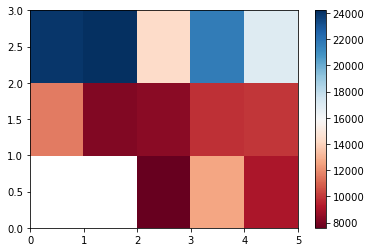

In [31]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

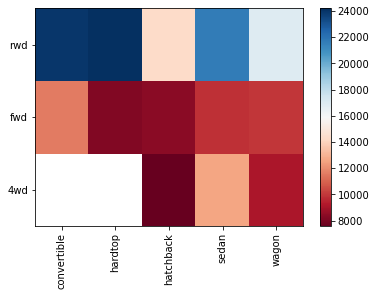

In [32]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<AxesSubplot:xlabel='None-body-style', ylabel='drive-wheels'>

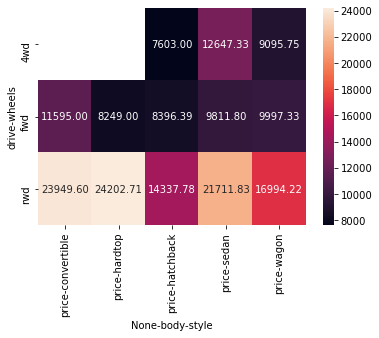

In [33]:
sns.heatmap(grouped_pivot, annot=True, fmt='.2f')

In [34]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [35]:
cols = ['wheel-base', 'horsepower', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'city-mpg', 'highway-mpg']
for col in cols:
    pearson_coef, p_value = stats.pearsonr(df[col], df['price'])
    print(f'PearsonR между {col} и price {pearson_coef} c Р-значением Р={p_value}')
    
    if p_value < 0.001:
        print(f'Корреляция между {col} и price статистически значимая')
    elif p_value < 0.05:
        print(f'Корреляция между {col} и price средняя')
    elif p_value < 0.1:
        print(f'Корреляция между {col} и price слабая')
    
    if pearson_coef > 0:
        if pearson_coef > 0.85:
            print(f'Коэффициент ~{pearson_coef} показывает положительную очень сильную связь\n')
        elif pearson_coef > 0.75:
            print(f'Коэффициент ~{pearson_coef} показывает положительную достаточно сильную связь\n')
        elif pearson_coef > 0.60:
            print(f'Коэффициент ~{pearson_coef} показывает положительную относительно сильную связь\n')
        elif pearson_coef > 0.50:
            print(f'Коэффициент ~{pearson_coef} показывает положительную среднюю сильную связь\n')
        else:
            print(f'Коэффициент ~{pearson_coef} показывает положительную слабую связь')
    else:
        if abs(pearson_coef) > 0.85:
            print(f'Коэффициент ~{pearson_coef} показывает негативную очень сильную связь\n')
        elif abs(pearson_coef) > 0.75:
            print(f'Коэффициент ~{pearson_coef} показывает негативную достаточно сильную связь\n')
        elif abs(pearson_coef) > 0.60:
            print(f'Коэффициент ~{pearson_coef} показывает негативную относительно сильную связь\n')
        elif abs(pearson_coef) > 0.50:
            print(f'Коэффициент ~{pearson_coef} показывает положительную среднюю сильную связь\n')
        else:
            print(f'Коэффициент ~{pearson_coef} показывает положительную слабую связь')

PearsonR между wheel-base и price 0.5846418222655081 c Р-значением Р=8.076488270732989e-20
Корреляция между wheel-base и price статистически значимая
Коэффициент ~0.5846418222655081 показывает положительную среднюю сильную связь

PearsonR между horsepower и price 0.809574567003656 c Р-значением Р=6.369057428259557e-48
Корреляция между horsepower и price статистически значимая
Коэффициент ~0.809574567003656 показывает положительную достаточно сильную связь

PearsonR между length и price 0.690628380448364 c Р-значением Р=8.016477466158986e-30
Корреляция между length и price статистически значимая
Коэффициент ~0.690628380448364 показывает положительную относительно сильную связь

PearsonR между width и price 0.7512653440522672 c Р-значением Р=9.20033551048217e-38
Корреляция между width и price статистически значимая
Коэффициент ~0.7512653440522672 показывает положительную достаточно сильную связь

PearsonR между curb-weight и price 0.8344145257702843 c Р-значением Р=2.189577238894065e-53


In [36]:
grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [37]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [38]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [39]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'],
                              grouped_test2.get_group('rwd')['price'],
                              grouped_test2.get_group('4wd')['price'])
print(f'ANOVA results: F= {f_val}, P= {p_val}')

ANOVA results: F= 67.95406500780399, P= 3.3945443577151245e-23


In [40]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])
print(f'ANOVA results: F= {f_val}, P= {p_val}')

ANOVA results: F= 130.5533160959111, P= 2.2355306355677845e-23


In [41]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])
print(f'ANOVA results: F= {f_val}, P= {p_val}')

ANOVA results: F= 8.580681368924756, P= 0.004411492211225333


In [42]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])
print(f'ANOVA results: F= {f_val}, P= {p_val}')

ANOVA results: F= 0.665465750252303, P= 0.41620116697845666


## Preprocessing by sklearn

In [43]:
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns
            
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = pr.LabelEncoder().fit_transform(output[col].astype(str))
        else:
            for colname, col in output.iteritems():
                output[colname] = pr.LabelEncoder().fit_transform(col.astype(str))
        return output
    
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [45]:
df = MultiColumnLabelEncoder(columns=['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'horsepower-binned']).fit_transform(df)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,0,0,1,0,2,0,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,2,0,1
1,3,122,0,0,1,0,2,0,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,2,0,1
2,1,122,0,0,1,2,2,0,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,2,0,1
3,2,164,1,0,0,3,1,0,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,2,0,1
4,2,164,1,0,0,3,0,0,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,21,0,0,3,2,0,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,2,0,1
197,-1,95,21,1,0,3,2,0,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,0,0,1
198,-1,95,21,0,0,3,2,0,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,2,0,1
199,-1,95,21,1,0,3,2,0,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,2,1,0


In [46]:
df = df.fillna(0)

In [47]:
y = df.price

In [48]:
X = df.drop('price', axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [55]:
print(regr.feature_importances_)

[0.00000000e+00 0.00000000e+00 4.19445982e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.59187667e-03 3.29384960e-03 4.92277560e-03 0.00000000e+00
 4.28988715e-01 1.22252081e-03 2.32488689e-03 3.83127806e-01
 0.00000000e+00 2.08281324e-03 4.45625958e-04 1.53848273e-03
 5.89497477e-02 3.74527089e-04 1.37245544e-02 5.84475101e-02
 3.85448619e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [56]:
df.drop('price', axis=1)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,horsepower-binned,diesel,gas
0,3,122,0,0,1,0,2,0,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,11.190476,2,0,1
1,3,122,0,0,1,0,2,0,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,11.190476,2,0,1
2,1,122,0,0,1,2,2,0,94.5,0.822681,...,3.47,9.0,154.0,5000.0,19,26,12.368421,2,0,1
3,2,164,1,0,0,3,1,0,99.8,0.848630,...,3.40,10.0,102.0,5500.0,24,30,9.791667,2,0,1
4,2,164,1,0,0,3,0,0,99.4,0.848630,...,3.40,8.0,115.0,5500.0,18,22,13.055556,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,21,0,0,3,2,0,109.1,0.907256,...,3.15,9.5,114.0,5400.0,23,28,10.217391,2,0,1
197,-1,95,21,1,0,3,2,0,109.1,0.907256,...,3.15,8.7,160.0,5300.0,19,25,12.368421,0,0,1
198,-1,95,21,0,0,3,2,0,109.1,0.907256,...,2.87,8.8,134.0,5500.0,18,23,13.055556,2,0,1
199,-1,95,21,1,0,3,2,0,109.1,0.907256,...,3.40,23.0,106.0,4800.0,26,27,9.038462,2,1,0


In [58]:
importances = list(zip(regr.feature_importances_, df.columns))
importances.sort(reverse=True)

In [59]:
importances

[(0.42898871516993176, 'curb-weight'),
 (0.3831278061693488, 'engine-size'),
 (0.05894974774754659, 'horsepower'),
 (0.058447510065482176, 'highway-mpg'),
 (0.03854486191196443, 'price'),
 (0.013724554362176653, 'city-mpg'),
 (0.004922775600059438, 'width'),
 (0.0032938496040047552, 'length'),
 (0.0023248868919002207, 'num-of-cylinders'),
 (0.0020828132435733717, 'bore'),
 (0.001591876668266976, 'wheel-base'),
 (0.001538482728906754, 'compression-ratio'),
 (0.0012225208084215952, 'engine-type'),
 (0.00044562595775643455, 'stroke'),
 (0.0004194459821507219, 'make'),
 (0.00037452708850942016, 'peak-rpm'),
 (0.0, 'symboling'),
 (0.0, 'num-of-doors'),
 (0.0, 'normalized-losses'),
 (0.0, 'horsepower-binned'),
 (0.0, 'height'),
 (0.0, 'fuel-system'),
 (0.0, 'engine-location'),
 (0.0, 'drive-wheels'),
 (0.0, 'diesel'),
 (0.0, 'city-L/100km'),
 (0.0, 'body-style'),
 (0.0, 'aspiration')]